In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [98]:
plt.rc('font', family='Malgun Gothic')

In [3]:
df_raw = pd.read_csv('C:\\Users\\SEOJIN\\Desktop\\jongp1_2021\\train_machinelearning\\train data\\text\\entire.csv', engine='python')
df_raw.head()

,HAPPY,DISGUSTED,CALM,SAD,FEAR,CONFUSED,SURPRISED,ANGRY,emotion
0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
1,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
2,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
3,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
4,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p


In [36]:
df_raw.describe()

,HAPPY,DISGUSTED,CALM,SAD,FEAR,CONFUSED,SURPRISED,ANGRY
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,24.071893,5.905627,37.518721,20.674885,0.043734,2.682020,0.142634,2.920793
std,39.586029,19.106420,34.824771,28.934603,0.810163,9.469941,2.189316,7.867107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,35.000000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,0.000000,75.000000,25.500000,0.000000,0.000000,0.000000,2.000000
max,100.000000,97.000000,96.000000,99.620000,16.000000,76.000000,41.000000,70.000000


In [4]:
df_raw_y = df_raw['emotion']
df_raw_x = df_raw.drop('emotion', axis=1, inplace=False)

In [5]:
# data 7:3 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('Train Data X size: {}'.format(df_train_x.shape))
print('Train Data Y size: {}'.format(df_train_y.shape))
print('Test Data X size: {}'.format(df_test_x.shape))
print('Test Data Y size: {}'.format(df_test_y.shape))

Train Data X size: (273, 8)
Train Data Y size: (273,)
Test Data X size: (118, 8)
Test Data Y size: (118,)


In [6]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.875
Score on test set:0.458


In [109]:
# leaf 노드 데이터 수 조정 
# leaf 노드가 가지는 데이터 수가 많아지면 과대적합 방지됨

train_score = []; test_score=[]

para_leaf = [n_leaf*2 for n_leaf in range(1,35)] # 개수는 그냥 마음대로? # 확인하고 싶은 만큼 보는거래

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [110]:
# 위의 모델의 성능 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.828,0.508
1,4,0.813,0.508
2,6,0.788,0.517
3,8,0.784,0.525
4,10,0.773,0.525
5,12,0.766,0.542
6,14,0.762,0.585
7,16,0.762,0.559
8,18,0.762,0.559
9,20,0.762,0.568


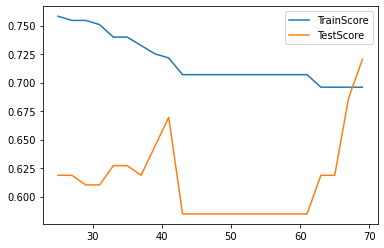

In [27]:
plt.plot(para_leaf, train_score, linestyle='-', label='TrainScore')
plt.plot(para_leaf, test_score, linestyle='-', label='TestScore')
plt.legend()

- 40 or 67

In [125]:
# branch 조정

train_score = []; test_score=[]

para_split = [n_split*15 for n_split in range(2,20)] # 개수는 그냥 마음대로?

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf = 67, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [126]:
# 위의 모델의 성능 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,30,0.696,0.686
1,45,0.696,0.686
2,60,0.696,0.686
3,75,0.696,0.686
4,90,0.696,0.686
5,105,0.696,0.686
6,120,0.696,0.686
7,135,0.696,0.686
8,150,0.696,0.686
9,165,0.696,0.686


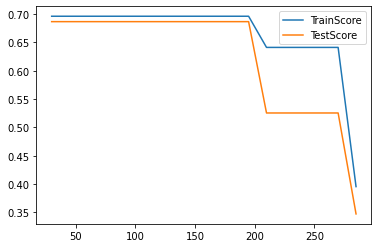

In [72]:
plt.plot(para_split, train_score, linestyle='-', label='TrainScore')
plt.plot(para_split, test_score, linestyle='-', label='TestScore')
plt.legend()

In [123]:
# depth 조정
train_score = []; test_score=[]

para_depth = [depth for depth in range(1,11)] # 개수는 그냥 마음대로?

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf = 67, min_samples_split=170, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [124]:
# 위의 모델의 성능 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.641,0.525
1,2,0.696,0.686
2,3,0.696,0.686
3,4,0.696,0.686
4,5,0.696,0.686
5,6,0.696,0.686
6,7,0.696,0.686
7,8,0.696,0.686
8,9,0.696,0.686
9,10,0.696,0.686


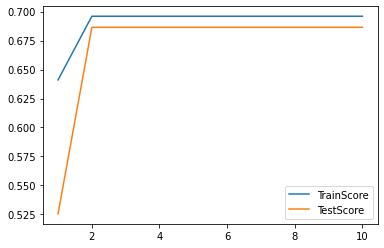

In [91]:
plt.plot(para_depth, train_score, linestyle='-', label='TrainScore')
plt.plot(para_depth, test_score, linestyle='-', label='TestScore')
plt.legend()

In [121]:
# 모델 선정
tree_final = DecisionTreeClassifier(min_samples_leaf=67, min_samples_split=170, max_depth=2, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=67, min_samples_split=170,
                       random_state=1234)

In [122]:
y_pred = tree_final.predict(df_test_x)

print('Accuracy: {0:.3f}\n'.format(tree_final.score(df_test_x,df_test_y)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.686

Confusion Matrix: 
[[27  0 14]
 [ 7 21  7]
 [ 9  0 33]]


In [95]:
# 결론 도출
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

In [96]:
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
0,HAPPY,0.88
2,CALM,0.12
1,DISGUSTED,0.00
3,SAD,0.00
4,FEAR,0.00
5,CONFUSED,0.00
6,SURPRISED,0.00
7,ANGRY,0.00


Text(0, 0.5, '설명변수')

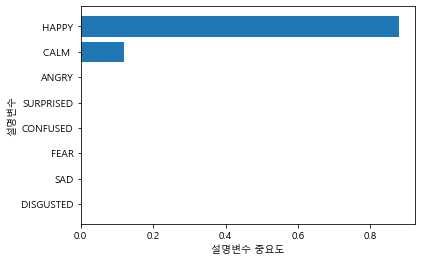

In [99]:
# 중요도가 높은 걸 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### gridSearchCV 적용

In [129]:
para_leaf = [n_leaf*2 for n_leaf in range(1,100)]
para_split = [n_split*10 for n_split in range(1,20)]
para_depth = [depth for depth in range(1,10)]

In [130]:
# gridsearchcv

estimator = DecisionTreeClassifier()
param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(max_depth=4, min_samples_leaf=24, min_samples_split=10)

best parameter:
{'max_depth': 4, 'min_samples_leaf': 24, 'min_samples_split': 10}

best score:
0.722


In [131]:
y_pred = grid_dt.predict(df_test_x)

print('Accuracy: {0:.3f}\n'.format(grid_dt.score(df_test_x,df_test_y)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.619

Confusion Matrix: 
[[29  0 12]
 [ 6 21  8]
 [19  0 23]]
